<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ec_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ecuaciones de una variable:

Para los siguiente problemas:


1.0 ¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

- Muestre que la expresión que permite resolver el problema:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- ¿Construya una grafica para theta?,  Alrededor de que punto esta solución.(Para este punto se recomienda emplear un data frame de pandas )

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.


2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.



3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.



5. Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}


Replicar el codigo y entender.


```

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize
from PIL import Image

In [3]:
theta = lambda x : x -np.sin(x)-np.pi/2

In [4]:
x =np.arange(0,2*np.pi, 0.01)
y = theta(x)

In [5]:
d = {'Theta': x, 'Funcion': y} # serie
df = pd.DataFrame(d) #dataframe
df

,Theta,Funcion
0,0.00,-1.570796
1,0.01,-1.570796
2,0.02,-1.570795
3,0.03,-1.570792
4,0.04,-1.570786
...,...,...
624,6.24,4.712376
625,6.25,4.712383
626,6.26,4.712387
627,6.27,4.712389


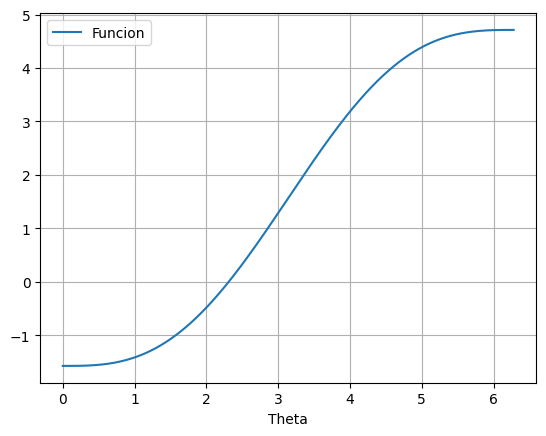

In [6]:
df.plot.line(x = 'Theta', y = 'Funcion') # le puedo aplicar .plot directamente a un DataFrame
plt.grid()
plt.show()

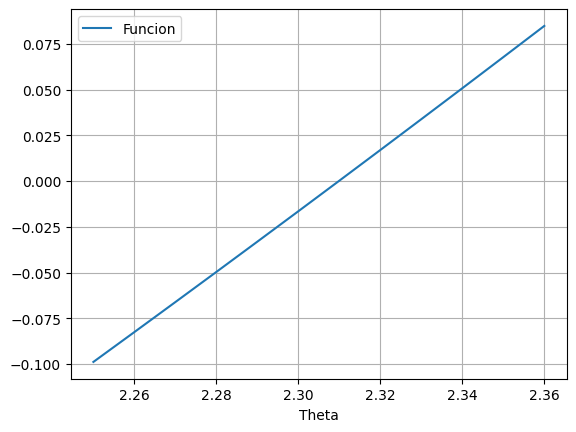

In [7]:
df_filtro = df[df.Funcion.between(-0.1, 0.1)]
df_filtro.plot.line(x = 'Theta', y = 'Funcion') # le puedo aplicar .plot directamente a un DataFrame
plt.grid()
plt.show()

# METODO DE BISECCION

In [8]:
raiz = optimize.bisect(theta, 2.30,2.31) # el inter valo se separa por comas ( , )
# el intervalo de optimize.bisect() la funcion evaluada debe ser con cambio de signo
raiz

2.3098814600089104

# METODO DE NEWTON- RHAPSON

In [9]:
theta = lambda x : x -np.sin(x)-np.pi/2
dtheta = lambda x: x -np.cos(x) # Para este metodo necesitamos la derivada

raiz_newton = optimize.newton(theta, 2.30, dtheta) # 2.30 es le punto de inicio x0
raiz_newton

2.309881451808715

# METODO DEL PUNTO FIJO

In [10]:
fixed_theta = lambda x: x -theta(x) # el punto menos el funcion evaludad en ese punto
raiz_fijo = optimize.fixed_point(fixed_theta, 2.30)

raiz_fijo

array(2.30988146)

#METODO DE LA SECANTE

In [11]:
#raiz_secante = optimize.secant

optimize.newton(theta,2.30)

2.3098814600100575

2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.


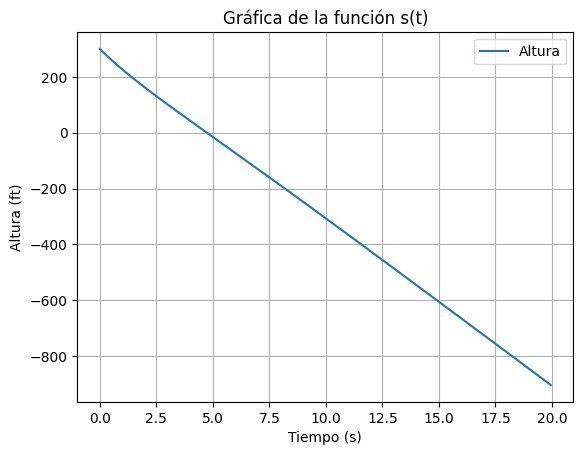

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from scipy import optimize

s0 = 300  # ft
m = 0.25  # lb
k = 0.1   # lbs/ft
g = 32.17 # ft/s^2

st = lambda x: s0 - (m * g / k) * x + ((m**2) * g / k) * x * (1 - np.exp(-k * x / m))

x = np.arange(0, 20, 0.05)
y = st(x)

d = {'tiempo': x, 'Altura': y}
df = pd.DataFrame(d)

df.plot.line(x='tiempo', y='Altura')
plt.title('Gráfica de la función s(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura (ft)')
plt.grid()
plt.show()


`Metodo de la biseccion`

**Solo necesita la funcion y dos puntos (a,b), donde la fución cambie de signo**









la raiz es 4.736139137604914


<Figure size 640x480 with 0 Axes>

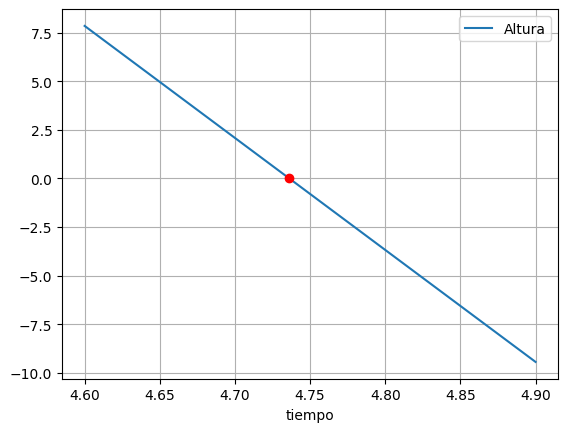

In [13]:
df_filtro= df[df.Altura.between(-10,10)]
#df_filtro.plot.line(x = 'tiempo', y = 'Altura')

root1 = optimize.bisect(st,4.7, 4.75)

print(f"la raiz es {root1}")
plt.figure()
df_filtro.plot(x = 'tiempo', y = 'Altura') # esto nos permite un zoom
plt.plot(root1, st(root1), 'ro' )
plt.grid()
plt.show()

`Metodo de punto fijo`

**Necesito f(x) y  g(x) al que g(x) = x -f(x). Tambien necesito un punto por el cual partir**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
from scipy import optimize

st = lambda x: s0 - (m * g / k) * x + ((m**2) * g / k) * x * (1 - np.exp(-k * x / m))

fixed_st = lambda x: x-st(x) # el punto menos la funion evaluada en ese punto

raiz_fijo = optimize.fixed_point(fixed_st, 4.75)
raiz_fijo


array(4.73613914)

`Metodo de Newton-Rhapson`

**Para este metodo necesitamos la funcion, su deriva y un punto x0 de inicio**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from scipy import optimize
import sympy as sp

s0 = 300  # ft
m = 0.25  # lb
k = 0.1   # lbs/ft
g = 32.17 # ft/s^2

In [16]:
x = sp.Symbol('x')
fun = lambda x: s0 - (m * g / k) * x + ((m**2) * g / k) * x * (1 - sp.exp(-k * x / m))
#derivada
sp.diff(fun(x),x,1)

8.0425*x*exp(-0.4*x) - 60.31875 - 20.10625*exp(-0.4*x)

In [17]:
st = lambda x: s0 - (m * g / k) * x + ((m**2) * g / k) * x * (1 - np.exp(-k * x / m))
dst = lambda x: - (m * g / k) + ((m**2) * g / k)-np.exp(-k * x / m) + (x*k/m)*(np.exp(-k * x / m))

In [18]:
root_newton = optimize.newton(st,4, dst)
root_newton

4.7361391374195465

`Metodo de secante`

**Para este metodo necesito minimamente la función y un punto, contrario al metodo de newton-rhapson.**

In [19]:
root_sec = optimize.newton(st,2) # hacercando me por a derecha
root_sec

4.73613913760349

In [20]:
root_sec1 = optimize.newton(st,4.7) # hacercando me por a izquierda
root_sec1

4.736139137603491

3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
from scipy import optimize

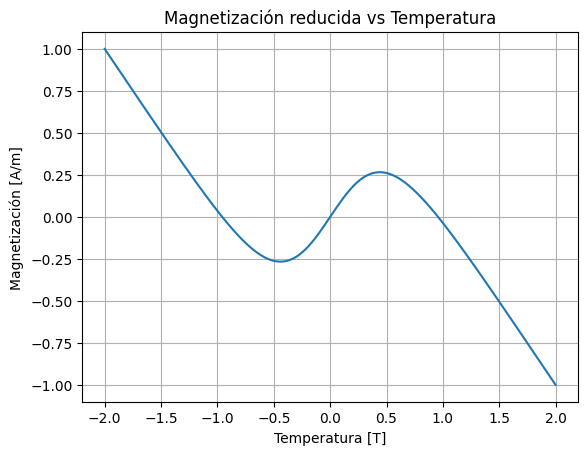

In [45]:
t = 0.5

mag = lambda m: np.tanh( m / t) -m

m = np.linspace(-2,2,1000)
T = mag(m)

plt.plot(m,T)
plt.title("Magnetización reducida vs Temperatura")
plt.xlabel('Temperatura [T]')
plt.ylabel('Magnetización [A/m]')
plt.grid()
plt.show()

# a) Metodo de la secante

(-0.9575, 0.0, 0.9575)


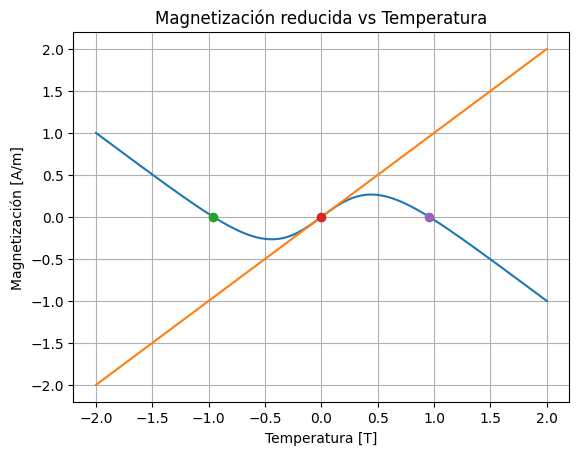

In [46]:
root_sec0 = optimize.newton(mag,-1)
root_sec1 = optimize.newton(mag,0.1)
root_sec2 = optimize.newton(mag,1)

Y = lambda m: m

print(f'{round(root_sec0, 4), round(root_sec1, 4), round(root_sec2, 4)}')
plt.figure()
plt.plot(m, T)
plt.plot(m, Y(m)) # Para punto fijo
plt.title("Magnetización reducida vs Temperatura")
plt.xlabel('Temperatura [T]')
plt.ylabel('Magnetización [A/m]')
plt.plot(root_sec0,mag(root_sec0),'o')
plt.plot(root_sec1,mag(root_sec1),'o')
plt.plot(root_sec2,mag(root_sec2),'o')
plt.grid()
plt.show()

# b) Metodo del punto fijo

**Necesito f(x) y  g(x) al que g(x) = x -f(x). Tambien necesito un punto por el cual partir**

-0.9575 0.0 0.9575


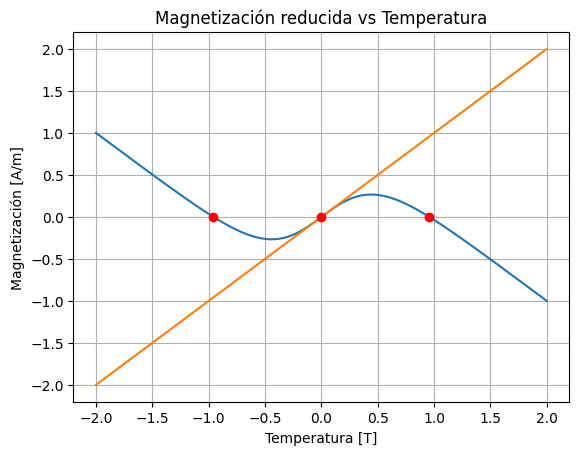

In [47]:
mag = lambda m: np.tanh( m / t) - m
Y = lambda m: m

fixed_mag = lambda m: m - mag(m)

root_fijo1 = optimize.fixed_point(fixed_mag, -1)
root_fijo2 = optimize.fixed_point(fixed_mag, 0.1)
root_fijo3 = optimize.fixed_point(fixed_mag, 1)

print(np.round(root_fijo1, 4),np.round(root_fijo2,4),np.round(root_fijo3,4))

plt.figure()
plt.plot(m, T)
plt.plot(m, Y(m)) # Para punto fijo
plt.title("Magnetización reducida vs Temperatura")
plt.xlabel('Temperatura [T]')
plt.ylabel('Magnetización [A/m]')
plt.plot(root_fijo1,mag(root_fijo1),'ro')
plt.plot(root_fijo2,mag(root_fijo2),'ro')
plt.plot(root_fijo3,mag(root_fijo3),'ro')
plt.grid()
plt.show()


# c)
Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

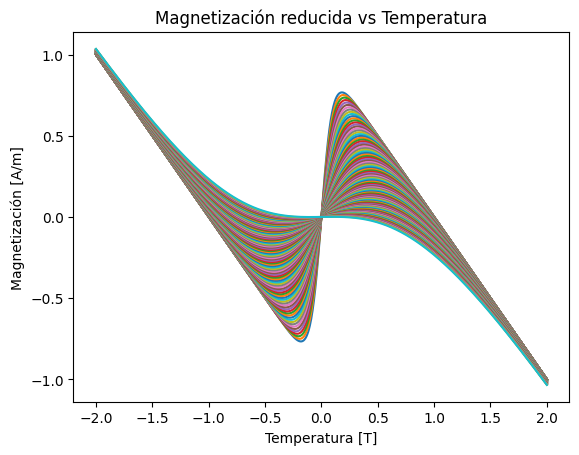

<Figure size 640x480 with 0 Axes>

In [48]:
# los valores de T en realidad son los valores de t

t = np.linspace(0.1, 0.99, 100)
for i in t:
  mag = lambda m: np.tanh( m / i) -m
  m = np.linspace(-2,2,1000)
  T = mag(m)
  plt.plot(m, T)
  plt.title("Magnetización reducida vs Temperatura")
  plt.xlabel('Temperatura [T]')
  plt.ylabel('Magnetización [A/m]')

plt.figure()
plt.show()

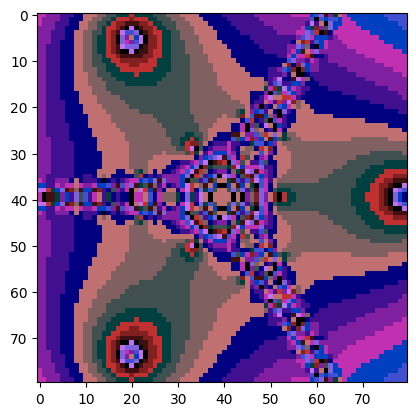

In [1]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
# Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

# Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break

        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16

      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
# plt.xlim(400, 600)
# plt.ylim(400, 523)

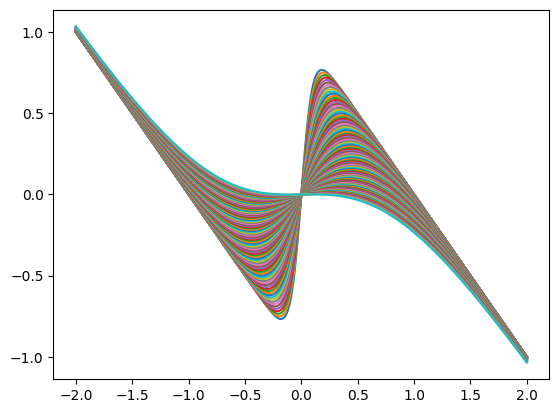

<Figure size 640x480 with 0 Axes>